# 5. Deep Learning Approach

## 5.1 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.preprocessing import OneHotEncoder

from keras.preprocessing import text, sequence

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, Flatten, MaxPooling1D, GlobalAveragePooling1D

import re

from nltk.tokenize import RegexpTokenizer

import logging
from tensorflow import keras
from keras.optimizers import SGD

from gensim.models import word2vec

from Classification import Classification
from Ensemble import Ensemble

from sklearn.metrics import confusion_matrix
import numpy as np

import itertools

Using TensorFlow backend.
C:\Users\candy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('Data/2.hotel_reviews_structured.csv')

In [3]:
df.head()

,hotel_name,review_summary,score,review
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo..."
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole..."


In [4]:
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df[['score']]).toarray())
# merge with main df bridge_df on key values
df = df.join(enc_df)
df.head()

,hotel_name,review_summary,score,review,0,1,2,3,4
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...,1.0,0.0,0.0,0.0,0.0
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo...",1.0,0.0,0.0,0.0,0.0
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...,1.0,0.0,0.0,0.0,0.0
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...,1.0,0.0,0.0,0.0,0.0
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole...",1.0,0.0,0.0,0.0,0.0


In [5]:
df = df.rename(columns={0: "score_1", 1:'score_2',2:'score_3',3:'score_4',4:'score_5'})

In [6]:
df.head()

,hotel_name,review_summary,score,review,score_1,score_2,score_3,score_4,score_5
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...,1.0,0.0,0.0,0.0,0.0
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo...",1.0,0.0,0.0,0.0,0.0
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...,1.0,0.0,0.0,0.0,0.0
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...,1.0,0.0,0.0,0.0,0.0
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole...",1.0,0.0,0.0,0.0,0.0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[['review','review_summary']], 
                                                    df[['score_1','score_2','score_3','score_4','score_5']], 
                                                    test_size=.2, 
                                                    random_state=42)

In [8]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

In [9]:
def add_sum_suffix(text):
    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        word = word + '_sum'
        new_text += word + ' '
    return new_text

In [10]:
x_train['review_summary_suffixed'] = x_train['review_summary'].apply(add_sum_suffix)
x_test['review_summary_suffixed'] = x_test['review_summary'].apply(add_sum_suffix)

In [11]:
x_train.head()

,review,review_summary,review_summary_suffixed
9048,"From arrival at check in, where we had great s...",Excellent hotel,excellent_sum hotel_sum
1219,After 3 hours waiting for chosen room booked o...,Don't bother with online check-in,don_sum t_sum bother_sum with_sum online_sum c...
6901,The hotel is very well located five minutes wa...,"Great location, cozy bar, good service",great_sum location_sum cozy_sum bar_sum good_s...
5466,We stayed here a total of 3 nights in April 20...,London base for land tour with Globus,london_sum base_sum for_sum land_sum tour_sum ...
6107,We recently stayed at Hilton Gatwick south ter...,Pre and post holiday stays,pre_sum and_sum post_sum holiday_sum stays_sum


In [12]:
def text_cleanup(text):
    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        new_text += word + ' '
    return new_text

In [13]:
x_train['review_cleaned'] = x_train['review'].apply(text_cleanup)
x_test['review_cleaned'] = x_test['review'].apply(text_cleanup)

In [14]:
x_train.head()

,review,review_summary,review_summary_suffixed,review_cleaned
9048,"From arrival at check in, where we had great s...",Excellent hotel,excellent_sum hotel_sum,from arrival at check in where we had great se...
1219,After 3 hours waiting for chosen room booked o...,Don't bother with online check-in,don_sum t_sum bother_sum with_sum online_sum c...,after hours waiting for chosen room booked onl...
6901,The hotel is very well located five minutes wa...,"Great location, cozy bar, good service",great_sum location_sum cozy_sum bar_sum good_s...,the hotel is very well located five minutes wa...
5466,We stayed here a total of 3 nights in April 20...,London base for land tour with Globus,london_sum base_sum for_sum land_sum tour_sum ...,we stayed here a total of nights in april the ...
6107,We recently stayed at Hilton Gatwick south ter...,Pre and post holiday stays,pre_sum and_sum post_sum holiday_sum stays_sum,we recently stayed at hilton gatwick south ter...


In [15]:
flat_review = " ".join(x_train['review_cleaned'].values)
flat_review = flat_review.lower().split()

In [16]:
len(flat_review)

733061

In [17]:
flat_review_summary = " ".join(x_train['review_summary_suffixed'].values)
flat_review_summary = flat_review_summary.lower().split()

In [18]:
unique_list = []
for word in flat_review:
    if word not in unique_list:
        unique_list.append(word)
for word in flat_review_summary:
    if word not in unique_list:
        unique_list.append(word)

In [19]:
len(unique_list)

17313

In [20]:
word_index_dict = {}
for i in range(0,len(unique_list)):
    word_index_dict[unique_list[i]] = i
    

In [21]:
word_index_dict = {k:(v+4) for k,v in word_index_dict.items()}
word_index_dict['<PAD>'] = 0
word_index_dict['<START>'] = 1
word_index_dict['<UNK>'] = 2
word_index_dict['<UNUSED>'] = 3

In [22]:
def index_review_words(text):
    review_word_list = []
    for word in text.lower().split():
        if word in word_index_dict.keys():
            review_word_list.append(word_index_dict[word])
        else:
            review_word_list.append(word_index_dict['<UNK>'])

    return review_word_list 

In [23]:
index_review_words('my name its ahilan!')

[188, 36, 306, 2]

In [24]:
len(word_index_dict)

17317

In [25]:
x_train['preprocessed_review'] = x_train['review_cleaned'].apply(index_review_words)
x_test['preprocessed_review'] = x_test['review_cleaned'].apply(index_review_words)

In [26]:
x_train['preprocessed_review_summary'] = x_train['review_summary_suffixed'].apply(index_review_words)
x_test['preprocessed_review_summary'] = x_test['review_summary_suffixed'].apply(index_review_words)

In [27]:
x_train.head()

,review,review_summary,review_summary_suffixed,review_cleaned,preprocessed_review,preprocessed_review_summary
9048,"From arrival at check in, where we had great s...",Excellent hotel,excellent_sum hotel_sum,from arrival at check in where we had great se...,"[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...","[14416, 14417]"
1219,After 3 hours waiting for chosen room booked o...,Don't bother with online check-in,don_sum t_sum bother_sum with_sum online_sum c...,after hours waiting for chosen room booked onl...,"[61, 62, 63, 64, 65, 42, 66, 67, 68, 69, 39, 7...","[14418, 14419, 14420, 14421, 14422, 14423, 14424]"
6901,The hotel is very well located five minutes wa...,"Great location, cozy bar, good service",great_sum location_sum cozy_sum bar_sum good_s...,the hotel is very well located five minutes wa...,"[33, 60, 111, 19, 112, 113, 114, 115, 116, 4, ...","[14425, 14426, 14427, 14428, 14429, 14430]"
5466,We stayed here a total of 3 nights in April 20...,London base for land tour with Globus,london_sum base_sum for_sum land_sum tour_sum ...,we stayed here a total of nights in april the ...,"[10, 144, 145, 22, 146, 25, 147, 8, 148, 33, 7...","[14431, 14432, 14433, 14434, 14435, 14421, 14436]"
6107,We recently stayed at Hilton Gatwick south ter...,Pre and post holiday stays,pre_sum and_sum post_sum holiday_sum stays_sum,we recently stayed at hilton gatwick south ter...,"[10, 172, 144, 6, 173, 174, 175, 176, 33, 49, ...","[14437, 14438, 14439, 14440, 14441]"


In [28]:
x_train['all_preprocessed_review'] = x_train['preprocessed_review'] + x_train['preprocessed_review_summary']
x_test['all_preprocessed_review'] = x_test['preprocessed_review'] + x_test['preprocessed_review_summary']

In [29]:
x_train = sequence.pad_sequences(x_train['all_preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=250)
x_test = sequence.pad_sequences(x_test['all_preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=250)

In [30]:
model = Sequential()
model.add(Embedding(17317,16))
model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.2,random_state=42)

In [33]:
fitModel = model.fit(x_train,y_train,epochs=60,batch_size=250,validation_data=(x_val,y_val),verbose=1)

C:\Users\candy\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6019 samples, validate on 1505 samples
Epoch 1/60
6019/6019 [==============================] - 0s 44us/step - loss: 1.6093 - accuracy: 0.1995 - val_loss: 1.6092 - val_accuracy: 0.1907
Epoch 2/60
6019/6019 [==============================] - 0s 29us/step - loss: 1.6083 - accuracy: 0.2549 - val_loss: 1.6080 - val_accuracy: 0.2551
Epoch 3/60
6019/6019 [==============================] - 0s 28us/step - loss: 1.6066 - accuracy: 0.2889 - val_loss: 1.6056 - val_accuracy: 0.2817
Epoch 4/60
6019/6019 [==============================] - 0s 28us/step - loss: 1.6024 - accuracy: 0.2863 - val_loss: 1.5992 - val_accuracy: 0.2831
Epoch 5/60
6019/6019 [==============================] - 0s 28us/step - loss: 1.5940 - accuracy: 0.2811 - val_loss: 1.5885 - val_accuracy: 0.2831
Epoch 6/60
6019/6019 [==============================] - 0s 28us/step - loss: 1.5805 - accuracy: 0.2856 - val_loss: 1.5716 - val_accuracy: 0.2877
Epoch 7/60
6019/6019 [==============================] - 0s 28us/step - loss: 1.561

In [34]:
model.evaluate(x_val,y_val)

1505/1505 [==============================] - 0s 11us/step


[1.0107281426654702, 0.5435215830802917]

In [35]:
model.evaluate(x_test,y_test)

1881/1881 [==============================] - 0s 11us/step


[0.9902665629975026, 0.5645933151245117]

In [36]:
def reverse_encode(y_df):
    y_df['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)['score'] = (y_df.iloc[:, 0:] == 1).idxmax(1)
    for i in range(0,len(y_df)):
        if y_df.iloc[i,-1] == 'score_1':
            y_df.iloc[i,-1] = 1
        elif y_df.iloc[i,-1] == 'score_2':
            y_df.iloc[i,-1] = 2
        elif y_df.iloc[i,-1]== 'score_3':
            y_df.iloc[i,-1] = 3
        elif y_df.iloc[i,-1]== 'score_4':
            y_df.iloc[i,-1] = 4
        elif y_df.iloc[i,-1] == 'score_5':
            y_df.iloc[i,-1]= 5
            

In [37]:
reverse_encode(y_test)

In [38]:
reverse_encode(y_val)

In [63]:
pd.DataFrame(np.argmax(model.predict(x_val),axis=1))[0].unique()[1]

2

In [70]:
np.argmax(model.predict(x_val),axis=1)

array([4, 4, 2, ..., 2, 2, 0], dtype=int64)

In [68]:
def add_one_argmax_score(x):
    x = x+1
    return x

In [71]:
y_val_predicted = add_one_argmax_score(np.argmax(model.predict(x_val),axis=1))

In [77]:
y_test_predicted = add_one_argmax_score(np.argmax(model.predict(x_test),axis=1))

In [74]:
val_cm = confusion_matrix(y_val['score'], y_val_predicted)

In [78]:
test_cm = confusion_matrix(y_test['score'], y_test_predicted)

In [79]:
def conf_matrix(cm):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(cm,
                     annot= True, 
                     fmt = '.4g', 
                     cbar=0,
                     xticklabels=[1,2,3,4,5],
                     yticklabels=[1,2,3,4,5])
    ax.set(xlabel='Predicted', ylabel='True')
    plt.show()

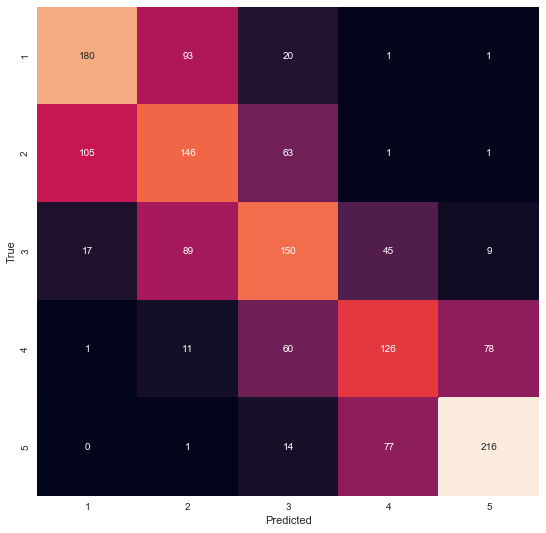

In [76]:
conf_matrix(val_cm)

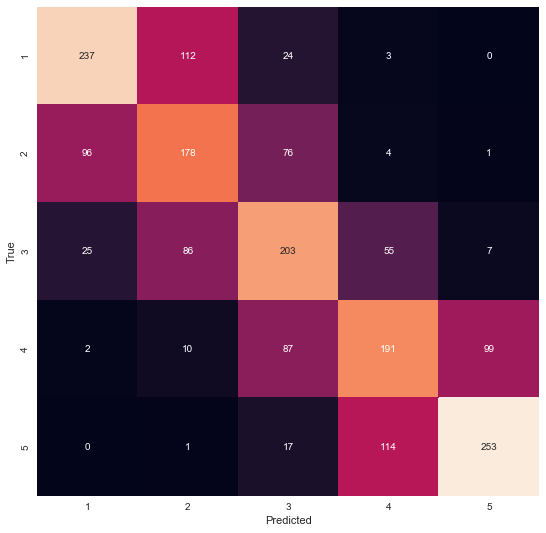

In [80]:
conf_matrix(test_cm)